Escribe una función en Python que encuentre los valores de `a`, `b`, y `c` para que la función cuadrática `f(x) = a x^2 + b x + c` pase exactamente por los siguientes puntos:

| x  | y  |
|---:|---:|
|  0 |  0 |
|  1 |  8 |
|  2 | 12 |
|  3 | 12 |
|  5 |  0 |

### Requisitos:
- La función debe explorar posibles valores de `a`, `b`, y `c` utilizando un método de prueba y error.
- Debe devolver los valores que hagan que la diferencia entre la función `f(x)` y los valores medidos `y` sea exactamente cero para cada punto.

> **Pista**: Los valores de `a`, `b`, y `c` son números pequeños.

In [2]:
X = [0,1,2,3,5]
Y = [0,8,12,12,0]

def f(x,a,b,c):
    return a*x**2 + b*x + c

def buscar():
    rango = range(-10,11)
    for a in rango:
        for b in rango:
            for c in rango:
                y = [f(x,a,b,c) for x in X]
                if Y == y:
                    return a,b,c
print(buscar())

(-2, 10, 0)


In [3]:
import numpy as np

X = [0,1,2,3,5]
Y = [0,8,12,12,0]
print(np.polyfit(X,Y,2))

[-2.00000000e+00  1.00000000e+01 -8.48559118e-15]


In [120]:
import numpy as np

x = np.array([0,1,2,3,5])
y = np.array([0,8,12,12,0])

def f(x, a, b, c):
    return a*x**2 + b*x + c

def error(y,yp):
    return np.sum((y-yp)**2)

def buscar():
    r = np.linspace(-10,10,21)
    for a in r:
        for b in r:
            for c in r:
                yp = f(x, a, b, c)
                e = error(y,yp)
                if e < 1:
                    return a,b,c 
    return None,None,None 

co = buscar()
print(f'Los parametros buscados son {co}')

Los parametros buscados son (-2.0, 10.0, 0.0)


Los parametros buscados son (-2.0, 10.0, -0.1999999999999993)
[-1.92194404  9.54933726  0.1826215 ]


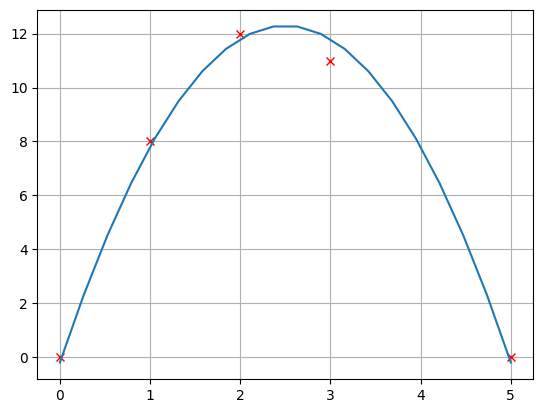

In [131]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([0,1,2,3,5])
y = np.array([0,8,12,11,0])

def f(x, a, b, c):
    return a*x**2 + b*x + c

def error(y,yp):
    return np.sum((y-yp)**2)

def buscar():
    e = np.inf
    ca,cb,cc = None, None, None 
    r = np.linspace(-10,10,101)
    for a in r:
        for b in r:
            for c in r:
                yp = f(x, a, b, c)
                ne = error(y,yp)
                if ne < e:
                    e = ne 
                    ca, cb, cc = a, b, c 
    return ca,cb,cc 

co = buscar()
print(f'Los parametros buscados son {co}')
plt.plot(x,y,'rx')
xr = np.linspace(min(x),max(x), 20)
plt.grid()
plt.plot(xr, f(xr, *co))
print(np.polyfit(x,y,2))

[-7 -3 -9]
El error es de 0.0005000000000048093 en 6035 interacciones
Los parametros buscados son [-2.   10.   -0.01]
[-2.00000000e+00  1.00000000e+01 -8.48559118e-15]


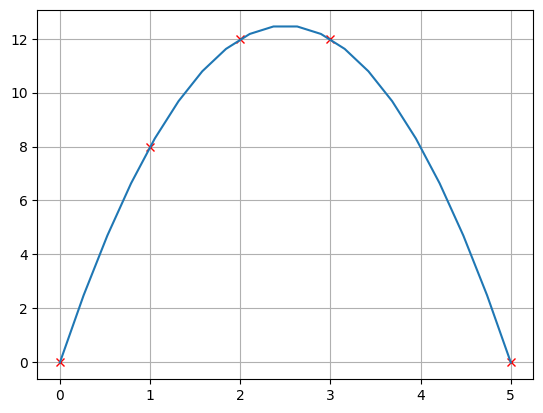

In [10]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([0,1,2,3,5])
y = np.array([0,8,12,12,0])

def f(x, a, b, c):
    return a*x**2 + b*x + c

def error(y,yp):
    return np.sum((y-yp)**2)

def buscar():
    e = np.inf
    co = np.random.randint(-10,10,3)
    print(co)
    n = 0 
    aprendizaje = 0.01
    while e > 0.001 and n < 100000:
        delta = np.random.randint(-10,10,3) * aprendizaje
        # print(delta) 
        nc = co + delta 
        yp = f(x, *nc)
        ne = error(y,yp)
        if ne < e:
            e = ne 
            co = nc 
        n += 1 
    print(f"El error es de {e} en {n} interacciones")
    return co 

co = buscar()
print(f'Los parametros buscados son {co.round(2)}')
plt.plot(x, y, 'rx')
xr = np.linspace(min(x),max(x), 20)
plt.grid()
plt.plot(xr, f(xr, *co))
print(np.polyfit(x,y,2))

[-0.42169554  0.53687381  0.25281311]
Iteración 1000, Error: 2.028484608043462, Coeficientes: [-1.80536405  8.8295459   1.22709317]
El error es de 0.9986327192485336 en 1255 interacciones
Los parametros buscados son [-1.86  9.18  0.86]
[-2.00000000e+00  1.00000000e+01 -8.48559118e-15]


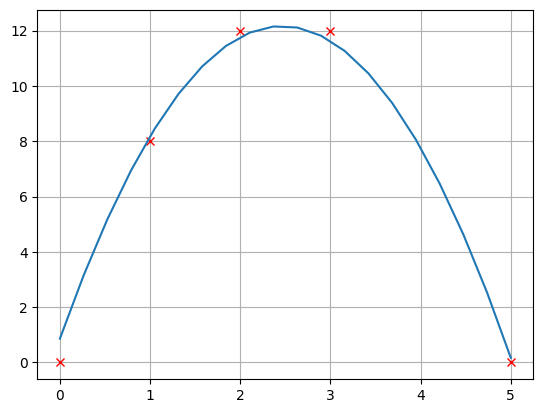

In [8]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([0,1,2,3,5])
y = np.array([0,8,12,12,0])

def f(x, a, b, c):
    return a*x**2 + b*x + c

def error(y,yp):
    return np.sum((y-yp)**2)

def buscar():
    e = np.inf
    co = np.random.randn(3)  # Inicializar con valores aleatorios normales
    print(co)
    n = 0 
    aprendizaje = 0.001
    while e > 1 and n < 100000:
        yp = f(x, *co)
        gradiente = np.array( [
            -2 * np.sum((y - yp) * x**2), 
            -2 * np.sum((y - yp) * x), 
            -2 * np.sum((y - yp) * 1)
        ])
        co = co - gradiente * aprendizaje 
        e = error(y, yp)
        n += 1 
        if n % 1000 == 0:
            print(f"Iteración {n}, Error: {e}, Coeficientes: {co}")

    print(f"El error es de {e} en {n} interacciones")
    return co 

co = buscar()
print(f'Los parametros buscados son {co.round(2)}')
plt.plot(x, y, 'rx')
xr = np.linspace(min(x),max(x), 20)
plt.grid()
plt.plot(xr, f(xr, *co))
print(np.polyfit(x,y,2))